In [1]:
import pandas as pd
import numpy as np

from IPython.display import display, HTML, display_html     # display output
pd.set_option('display.max_rows', 200)                      # display rows
pd.set_option('display.max_columns', 60)                    # display columns
pd.set_option('display.float_format', lambda x: '%.3f' % x) # display 3 decimal point 

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
color = sns.color_palette()
# Set the Seaborn theme if desired
sns.set_style("darkgrid")

# ignore sklearn & seaborn warnings
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn 

#My function
from util import *

#https://github.com/Jenniferz28/Time-Series-ARIMA-XGBOOST-RNN

In [65]:
df

,Sales document,Actual Goods Issue Year Period,Actual GI Date,Req del date,Sold-to party,Sold to Name,Hierarchy,Ship-to party,Ship To Name,Location (City),Region,Region Name,Postal Code,Sales Org,Sales Org Name,Distr Chan,Distr Chan Name,Division,Division Name,Document date,Plant,Plant Name,Postal Code.1,Location (City).1,Region- Plant,Region-Plant Name,Del No.,Material,Description,PPG,Order qty,Gds mvt qty,Gross weight ord (Lb),Gross weight dlvrd (Lb),GSV delivered,Price,DD_week_num,DD_month,DD_year,DC,approx_unit_lb,description_name,description_weight,GI_month,GI_week,GI_year,RDD_month,RDD_week,RDD_year,GI-to-RDD,PO-to-RDD,PO-to-GI,Late,Correct_DC
0,5003612916,2017P01,2017-01-01,2017-01-02,10193505,RANDALLS FOOD & DRUG,ALBERTSONS-SAFEWAY,10202354,RANDALLS / TOM THUMB 2012,ROANOKE,TX,Texas,76262,241,Mars US Food,10,Non Specific,51,Non Specific,2016-12-19,USV6,Waco TX DFC - Food,76712-6533,Waco,TX,Texas,5601012553,10104709,UB LONG GRAIN & WILD ORIGINAL 12/6OZ IRC,UB Flav Grains,150,150,855.150,855.150,2952.000,19.680,51,12,2016,USV6,5.701,UB LONG GRAIN WILD ORIGINAL,126OZ IRC,1,52,2017,1,1,2017,1,14,13,0,True
1,5003612916,2017P01,2017-01-01,2017-01-02,10193505,RANDALLS FOOD & DRUG,ALBERTSONS-SAFEWAY,10202354,RANDALLS / TOM THUMB 2012,ROANOKE,TX,Texas,76262,241,Mars US Food,10,Non Specific,51,Non Specific,2016-12-19,USV6,Waco TX DFC - Food,76712-6533,Waco,TX,Texas,5601012553,U0100504,UB CONVERTED BRAND RICE 6/5LB,UB Dry 5lb,35,35,1130.501,1130.500,1356.600,38.760,51,12,2016,USV6,32.300,UB CONVERTED BRAND RICE,65LB,1,52,2017,1,1,2017,1,14,13,0,True
2,5003612916,2017P01,2017-01-01,2017-01-02,10193505,RANDALLS FOOD & DRUG,ALBERTSONS-SAFEWAY,10202354,RANDALLS / TOM THUMB 2012,ROANOKE,TX,Texas,76262,241,Mars US Food,10,Non Specific,51,Non Specific,2016-12-19,USV6,Waco TX DFC - Food,76712-6533,Waco,TX,Texas,5601012553,U0307600,UNCLE BEN'S RR ROASTED CHICKEN 12/8.8OZ,UB Ready Rice,42,42,310.380,310.380,826.560,19.680,51,12,2016,USV6,7.390,UNCLE BENS RR ROASTED CHICKEN,1288OZ,1,52,2017,1,1,2017,1,14,13,0,True
3,5003612916,2017P01,2017-01-01,2017-01-02,10193505,RANDALLS FOOD & DRUG,ALBERTSONS-SAFEWAY,10202354,RANDALLS / TOM THUMB 2012,ROANOKE,TX,Texas,76262,241,Mars US Food,10,Non Specific,51,Non Specific,2016-12-19,USV6,Waco TX DFC - Food,76712-6533,Waco,TX,Texas,5601012553,U0307700,UB READY RICE LONG GRAIN & WILD 12/8.8OZ,UB Ready Rice,63,63,465.570,465.570,1239.840,19.680,51,12,2016,USV6,7.390,UB READY RICE LONG GRAIN WILD,1288OZ,1,52,2017,1,1,2017,1,14,13,0,True
4,5003612916,2017P01,2017-01-01,2017-01-02,10193505,RANDALLS FOOD & DRUG,ALBERTSONS-SAFEWAY,10202354,RANDALLS / TOM THUMB 2012,ROANOKE,TX,Texas,76262,241,Mars US Food,10,Non Specific,51,Non Specific,2016-12-19,USV6,Waco TX DFC - Food,76712-6533,Waco,TX,Texas,5601012553,U0308000,UB READY RICE SPANISH STYLE 12/8.8OZ,UB Ready Rice,63,63,465.570,465.570,1239.840,19.680,51,12,2016,USV6,7.390,UB READY RICE SPANISH STYLE,1288OZ,1,52,2017,1,1,2017,1,14,13,0,True
5,5003612916,2017P01,2017-01-01,2017-01-02,10193505,RANDALLS FOOD & DRUG,ALBERTSONS-SAFEWAY,10202354,RANDALLS / TOM THUMB 2012,ROANOKE,TX,Texas,76262,241,Mars US Food,10,Non Specific,51,Non Specific,2016-12-19,USV6,Waco TX DFC - Food,76712-6533,Waco,TX,Texas,5601012553,U0317600,UB RR ORIGINAL LONG GRAIN WHITE 12/8.8OZ,UB Ready Rice,126,126,931.141,931.140,2479.680,19.680,51,12,2016,USV6,7.390,UB RR ORIGINAL LONG GRAIN WHITE,1288OZ,1,52,2017,1,1,2017,1,14,13,0,True
6,5003612916,2017P01,2017-01-01,2017-01-02,10193505,RANDALLS FOOD & DRUG,ALBERTSONS-SAFEWAY,10202354,RANDALLS / TOM THUMB 2012,ROANOKE,TX,Texas,76262,241,Mars US Food,10,Non Specific,51,Non Specific,2016-12-19,USV6,Waco TX DFC - Food,76712-6533,Waco,TX,Texas,5601012553,U0402303,UB BOIL-IN-BAG RICE 12/15.8OZ,UB BIB,98,98,1374.059,1374.058,2387.280,24.360,51,12,2016,USV6,14.021,UB BOILINBAG RICE,12158OZ,1,52,2017,1,1,2017,1,14,13,0,True
7,5003612916,2017P01,2017-01-01,2017-01-02,10193505,RANDALLS FOOD & DRUG,ALBERTSONS-SAFEWAY,10202354,RANDALLS / TOM THUMB 2012,ROANO

In [2]:
# def bucket_avg(ts, bucket):
#     # ts is Sereis with index
#     # bucket =["30T","60T","M".....]
#     y = ts.resample(bucket).mean()
#     return y

In [3]:
# import data
df = pd.read_csv('./Data/inventory_split2.csv', index_col=[0])

In [4]:
# Adjusting date to datetime
date_columns = ['Actual GI Date', 'Req del date', 'Document date']
for date_column in date_columns:
    df[date_column] = pd.to_datetime(df[date_column])

In [5]:
df.describe()

,Sales document,Sold-to party,Ship-to party,Sales Org,Distr Chan,Division,Del No.,Order qty,Gds mvt qty,Gross weight ord (Lb),Gross weight dlvrd (Lb),GSV delivered,Price,DD_week_num,DD_month,DD_year,approx_unit_lb,GI_month,GI_week,GI_year,RDD_month,RDD_week,RDD_year,GI-to-RDD,PO-to-RDD,PO-to-GI,Late
count,604170.000,604170.000,604170.000,604170.000,604170.000,604170.000,604170.000,604170.000,604170.000,604170.000,604170.000,604170.000,604170.000,604170.000,604170.000,604170.000,604170.000,604170.000,604170.000,604170.000,604170.000,604170.000,604170.000,604170.000,604170.000,604170.000,604170.000
mean,5004391762.959,10202173.397,10223515.444,240.721,10.398,51.017,5602043500.253,83.975,80.574,1100.977,1066.793,2030.007,57.445,24.591,6.039,2017.922,32.934,6.121,24.809,2017.936,6.140,24.916,2017.940,2.115,9.915,7.800,0.163
std,483016.263,26114.243,55184.020,5.167,2.722,0.322,668748.977,127.908,125.420,2742.024,2724.590,5177.000,273.752,14.365,3.301,0.793,172.428,3.289,14.299,0.786,3.280,14.270,0.788,4.008,4.664,5.193,0.369
min,5003427664.000,10051885.000,10051919.000,145.000,10.000,51.000,5600685983.000,1.000,0.000,3.150,0.000,0.000,8.160,1.000,1.000,2016.000,3.150,1.000,1.000,2017.000,1.000,1.000,2016.000,-80.000,-20.000,0.000,0.000
25%,5003971855.000,10197635.000,10196864.000,241.000,10.000,51.000,5601460058.000,15.000,12.000,142.727,119.040,282.480,18.840,12.000,3.000,2017.000,6.852,3.000,12.000,2017.000,3.000,13.000,2017.000,0.000,8.000,5.000,0.000
50%,5004349028.000,10197635.000,10201753.000,241.000,10.000,51.000,5602005819.000,42.000,42.000,449.190,432.020,972.720,19.080,24.000,6.000,2018.000,7.374,6.000,24.000,2018.000,6.000,25.000,2018.000,1.000,9.000,7.000,0.000
75%,5004807302.000,10198228.000,10203248.000,241.000,10.000,51.000,5602618051.750,120.000,105.000,931.141,931.140,2404.080,23.520,36.000,9.000,2019.000,12.456,9.000,37.000,2019.000,9.000,37.000,2019.000,4.000,11.000,10.000,0.000
max,5005312670.000,10429897.000,17468887.000,241.000,32.000,57.000,5603283685.000,6200.000,6200.000,43104.377,43104.377,134134.560,3209.840,52.000,12.000,2019.000,2105.436,12.000,52.000,2019.000,12.000,52.000,2019.000,381.000,393.000,154.000,1.000


Key take aways..

1) Approximate of PO-to-RDD is 10 days. <br>
2) PO-to-GI is approximately 8 days 

..meaning,it is ideal to have inventory ready **a week (3-5 days) prior** to the RDD. Should we base our analysis on GI date? No, because there is possiblity of order being shipped out late and may negatively influence our data.

We will base our analysis on Customer Request Date then look -1WK

In [6]:
display(df[['GI-to-RDD','PO-to-GI','PO-to-RDD']].describe())
display(df[['Actual Goods Issue Year Period']][:1],
      df[['Actual Goods Issue Year Period']][-1:])
display(df['Document date'].min())
display(df[['Actual GI Date']].tail(1))

,GI-to-RDD,PO-to-GI,PO-to-RDD
count,604170.000,604170.000,604170.000
mean,2.115,7.800,9.915
std,4.008,5.193,4.664
min,-80.000,0.000,-20.000
25%,0.000,5.000,8.000
50%,1.000,7.000,9.000
75%,4.000,10.000,11.000
max,381.000,154.000,393.000


,Actual Goods Issue Year Period
0,2017P01


,Actual Goods Issue Year Period
606169,2019P10


Timestamp('2016-08-25 00:00:00')

,Actual GI Date
606169,2019-10-05


The data is representing the Actual GI from Mars Year period starting from: <br> 2017P01 to 2019P10.

## How should I discard the data?

Since I'll be looking at week level for broadening the data points (which I'm not working monthly), for accuracy purpose, I'll discard the last two weeks. Therefore, **latest RDD will be 10/5/2019**

In [7]:
# discard before 10/06/2019
df = df[df['Req del date'] < '2019-10-06']

In [8]:
# Find TopSKUs Descending order qty.
TopSKU = df.pivot_table(values='Order qty', index='Description', aggfunc = lambda x: x.sum()).sort_values(by='Order qty', ascending=False)

In [9]:
# Pivot: Order qty per Plant on SKU0
SKU_i = 2


temp = df[df['Description'].isin([TopSKU.index[SKU_i]])].pivot_table(values='Order qty', index=['Req del date'],columns='Plant',aggfunc = lambda x: x.sum()).fillna(0)

# To Ratios
temp = temp.loc[:,temp.columns].div(temp.sum(axis=1), axis=0)
temp = pd.DataFrame(temp.to_records()).set_index('Req del date')
temp.head(3)

### I will have to make this into a function

,USC8,USD3,USE2,USJ7,USV2,USV6
Req del date,,,,,,
2016-12-29,0.000,0.000,0.000,1.000,0.000,0.000
2016-12-30,0.000,0.000,1.000,0.000,0.000,0.000
2017-01-02,0.000,0.000,0.000,0.000,0.000,1.000


In [10]:
# TESTING USJ7 on SKU0
data = pd.DataFrame(temp.iloc[:,3].copy()) # Test USJ7
data.columns = ['y']                       # target
#------------------------------------------------------------------
bucket_size="w"                            # by week
df1 = pd.DataFrame(bucket_avg(data.y,bucket_size))

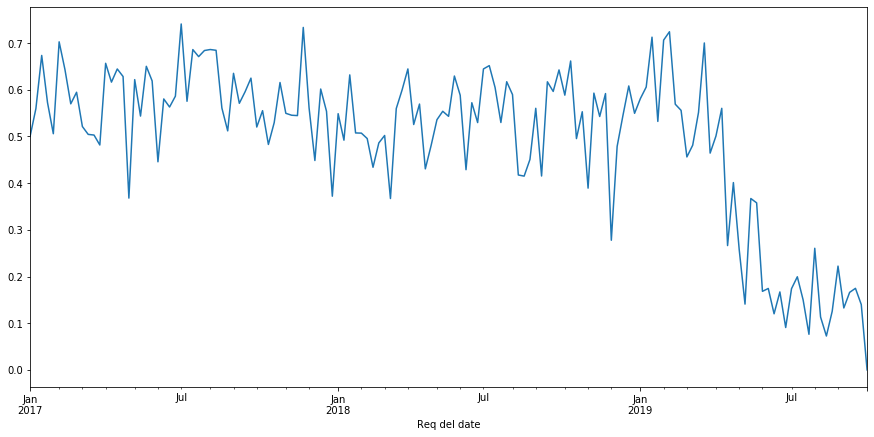

In [11]:
# PLOT
plt.figure(figsize = (15,7))
df1.y.plot()
plt.show()

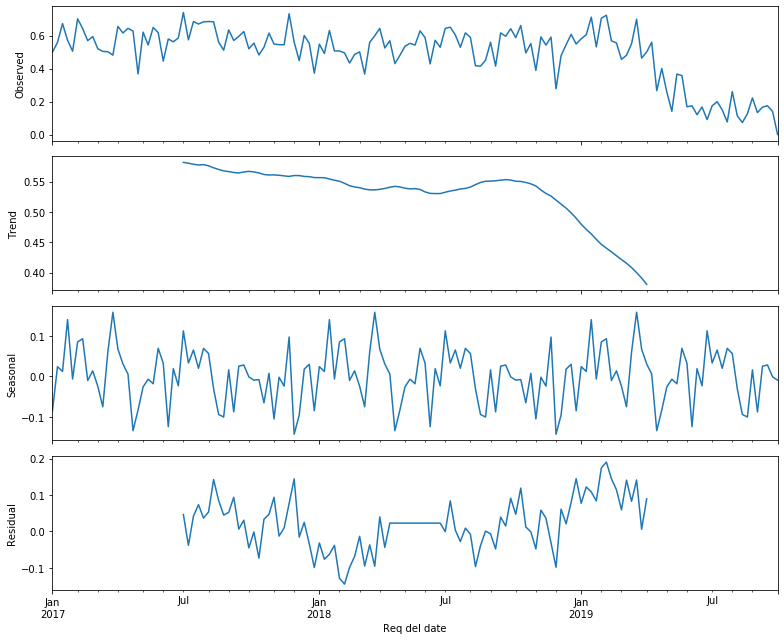

In [12]:
# component plot
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 11, 9
decomposition = sm.tsa.seasonal_decompose(df1.y, model='additive')
fig = decomposition.plot()
plt.tight_layout()
# plt.savefig( 'ts_decomposition_plot.png', dpi=300)
plt.show()

# Lags of time series
shifting the series **n** stemps backc we get a feature column wher ethe current value of timeseries is aligned with its value at the time **t-n**

In [13]:
df1 = pd.DataFrame(bucket_avg(data.y,bucket_size))

# adding the lag of the target variable from 4 steps back up to 12
for i in range(2,12):
    df1['lag_{}'.format(i)] = df1.y.shift(i)
    
display(df1)
# seperating target and features
y = df1.dropna().y
X = df1.dropna().drop(['y'], axis=1)

,y,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11
Req del date,,,,,,,,,,,
2017-01-01,0.500,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2017-01-08,0.559,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2017-01-15,0.673,0.500,nan,nan,nan,nan,nan,nan,nan,nan,nan
2017-01-22,0.572,0.559,0.500,nan,nan,nan,nan,nan,nan,nan,nan
2017-01-29,0.506,0.673,0.559,0.500,nan,nan,nan,nan,nan,nan,nan
2017-02-05,0.703,0.572,0.673,0.559,0.500,nan,nan,nan,nan,nan,nan
2017-02-12,0.643,0.506,0.572,0.673,0.559,0.500,nan,nan,nan,nan,nan
2017-02-19,0.570,0.703,0.506,0.572,0.673,0.559,0.500,nan,nan,nan,nan
2017-02-26,0.595,0.643,0.703,0.506,0.572,0.673,0.559,0.500,nan,nan,nan


In [14]:
# Error function (Mean Absolute Percentage Error)
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

from sklearn.metrics import median_absolute_error,r2_score , mean_absolute_error,\
                            mean_squared_error, mean_squared_log_error


In [15]:
from sklearn.linear_model import LinearRegression            # linear model
from sklearn.model_selection import cross_val_score          # cv
from sklearn.model_selection import TimeSeriesSplit          # you have everything done for you

# for time-series cross-validation set 5 folds 
tscv = TimeSeriesSplit(n_splits=5)

#------------------------------------------------------------------------------------------------
def timeseries_train_test_split(X, y, test_size):
    """
        Perform train-test split with respect to time series structure
        test_size: percentage
    """
    
    # get the index after which test set starts
    test_index = int(len(X)*(1-test_size))
    
    X_train = X.iloc[:test_index]
    y_train = y.iloc[:test_index]
    X_test = X.iloc[test_index:]
    y_test = y.iloc[test_index:]
    
    return X_train, X_test, y_train, y_test

def plotModelResults(model, X_train, X_test, plot_intervals=False, plot_anomalies=False, scale=1.96):
    """
        Plots modelled vs fact values, prediction intervals and anomalies
    
    """
    
    prediction = model.predict(X_test)
    
    plt.figure(figsize=(15, 7))
    plt.plot(prediction, "g", label="prediction", linewidth=2.0)
    plt.plot(y_test.values, label="actual", linewidth=2.0)
    
    if plot_intervals:
        cv = cross_val_score(model, X_train, y_train, 
                                    cv = tscv, 
                                    scoring="neg_mean_squared_error")
# for scoring "neg_mean_squared_error" is used for RMSE which penalize large error
# compared to the regular MAE
        #mae = cv.mean() * (-1)
        deviation = np.sqrt(cv.std())
        
        lower = prediction - (scale * deviation)
        upper = prediction + (scale * deviation)
        
        plt.plot(lower, "r--", label="upper bond / lower bond", alpha=0.5)
        plt.plot(upper, "r--", alpha=0.5)
        
        if plot_anomalies:
            anomalies = np.array([np.NaN]*len(y_test))
            anomalies[y_test<lower] = y_test[y_test<lower]
            anomalies[y_test>upper] = y_test[y_test>upper]
            plt.plot(anomalies, "o", markersize=10, label = "Anomalies")
    
    error = mean_absolute_percentage_error(prediction, y_test)
    plt.title("Mean absolute percentage error {0:.2f}%".format(error))
    plt.legend(loc="best")
    plt.tight_layout()
    plt.grid(True);
    
def plotCoefficients(model):
    """
        Plots sorted coefficient values of the model
    """
    
    coefs = pd.DataFrame(model.coef_, X_train.columns)  # model.coef_
    coefs.columns = ["coef"]
    
    #by taking absolute values and sort. then drop
    coefs["abs"] = coefs.coef.apply(np.abs)
    coefs = coefs.sort_values(by="abs", ascending=False).drop(["abs"], axis=1)

    plt.figure(figsize=(15, 7))
    coefs.coef.plot(kind='bar')
    plt.grid(True, axis='y')
    plt.hlines(y=0, xmin=0, xmax=len(coefs), linestyles='dashed');

In [16]:
# reserve 30% of data for testing
X_train, X_test, y_train, y_test = timeseries_train_test_split(X, y, test_size=0.3)



In [17]:
# machine learning in two lines
lr = LinearRegression()
lr.fit(X_train, y_train)

cross_val_score(lr, X_train, y_train, 
                                    cv = tscv, 
                                    scoring="neg_mean_squared_error")

array([-0.0331239 , -0.01424651, -0.00714376, -0.00980425, -0.01109151])

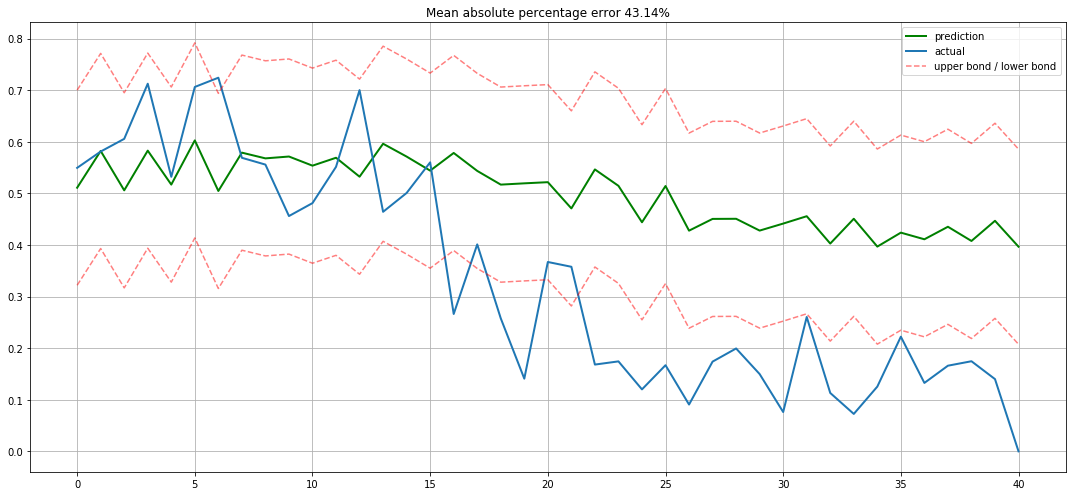

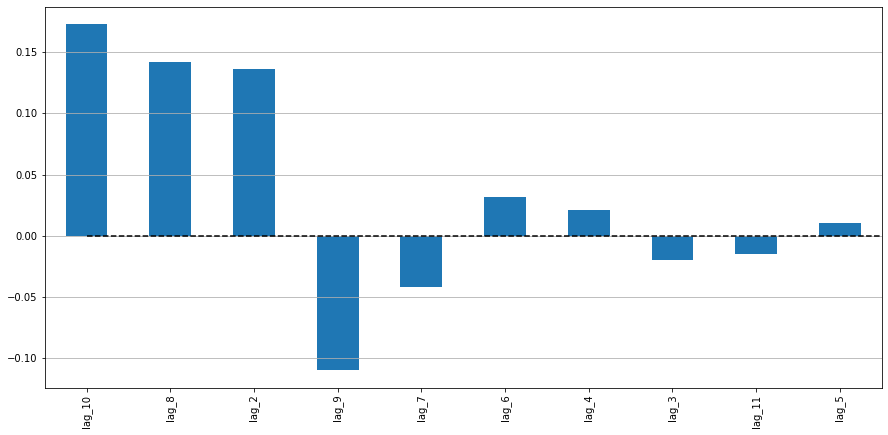

In [18]:
plotModelResults(lr, X_train, X_test, plot_intervals=True)
plotCoefficients(lr)

In [66]:
#--------------------------------------------------------------------
#--------------BUSINESS VS PREDICT
mean_absolute_percentage_error(lr.predict(X_test), y_test)

#Create np array for business guess

guess = y_train.iloc[-12:].mean() # last 52 weeks
a = np.empty(len(X_test))
a.fill(guess)

mean_absolute_percentage_error(a, y_test)
mean_squared_error(lr.predict(X_test), y_test)
mean_absolute_percentage_error(a, y_test)



44.39841951658128

Engineered Features

In [20]:
# SKU0 on USJ7
temp = df[df['Description'].isin([TopSKU.index[SKU_i]])]
temp = temp[temp['Plant']=='USJ7']

# feature1: Unique DO_count per week
DO_count = temp.pivot_table(values='Del No.', index='Req del date', aggfunc = lambda x: x.nunique())
DO_count = pd.DataFrame(bucket(DO_count['Del No.'], bucket_size, 'sum'))

# feature2: weight 
weight = temp.pivot_table(values='Gross weight ord (Lb)', index='Req del date', aggfunc = lambda x: x.sum())
weight = pd.DataFrame(bucket(weight['Gross weight ord (Lb)'], bucket_size, 'sum'))

# feature3: order qty
qty = temp.pivot_table(values='Order qty', index='Req del date', aggfunc = lambda x: x.sum())
qty = pd.DataFrame(bucket(qty['Order qty'], bucket_size, 'sum'))

# feature4: correctDC
correct = temp.pivot_table(values='Correct_DC', index='Req del date', aggfunc = lambda x: x.mean())
correct = pd.DataFrame(bucket(correct['Correct_DC'], bucket_size, 'mean'))

# feature5: late
late = temp.pivot_table(values='Late', index='Req del date', aggfunc = lambda x: x.mean())
late = pd.DataFrame(bucket(late['Late'], bucket_size, 'mean'))

# feature6: unique sold-to-party count
sold2p = temp.pivot_table(values='Sold-to party', index='Req del date', aggfunc = lambda x: x.nunique()) 
sold2p = pd.DataFrame(bucket(sold2p['Sold-to party'], bucket_size, 'sum'))

In [21]:

df1['DO_count'] = DO_count['Del No.']
df1['weight'] = weight['Gross weight ord (Lb)']
df1['total_qty'] = qty['Order qty']
df1['correct'] = correct['Correct_DC']
df1['late'] = late['Late']
df1['sold2p'] = sold2p['Sold-to party']


In [22]:
df1

,y,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,DO_count,weight,total_qty,correct,late,sold2p
Req del date,,,,,,,,,,,,,,,,,
2017-01-01,0.500,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.000,1862.279,252.000,0.000,1.000,1.000
2017-01-08,0.559,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,17.000,23603.664,3194.000,0.500,0.083,12.000
2017-01-15,0.673,0.500,nan,nan,nan,nan,nan,nan,nan,nan,nan,46.000,53060.220,7180.000,0.503,0.000,18.000
2017-01-22,0.572,0.559,0.500,nan,nan,nan,nan,nan,nan,nan,nan,44.000,65046.789,8802.000,0.393,0.000,15.000
2017-01-29,0.506,0.673,0.559,0.500,nan,nan,nan,nan,nan,nan,nan,45.000,54471.715,7371.000,0.418,0.000,15.000
2017-02-05,0.703,0.572,0.673,0.559,0.500,nan,nan,nan,nan,nan,nan,54.000,74210.394,10042.000,0.405,0.029,18.000
2017-02-12,0.643,0.506,0.572,0.673,0.559,0.500,nan,nan,nan,nan,nan,51.000,72821.077,9854.000,0.426,0.000,19.000
2017-02-19,0.570,0.703,0.506,0.572,0.673,0.559,0.500,nan,nan,nan,nan,47.000,64773.365,8765.000,0.454,0.048,16.000
2017-02-26,0.595,0.643,0.703,0.506,0.572,0.673,0.559,0.500,nan,nan,nan,44.000,58935.268,7975.000,0.476,0.059,14.000


make sure to scale after adding different features

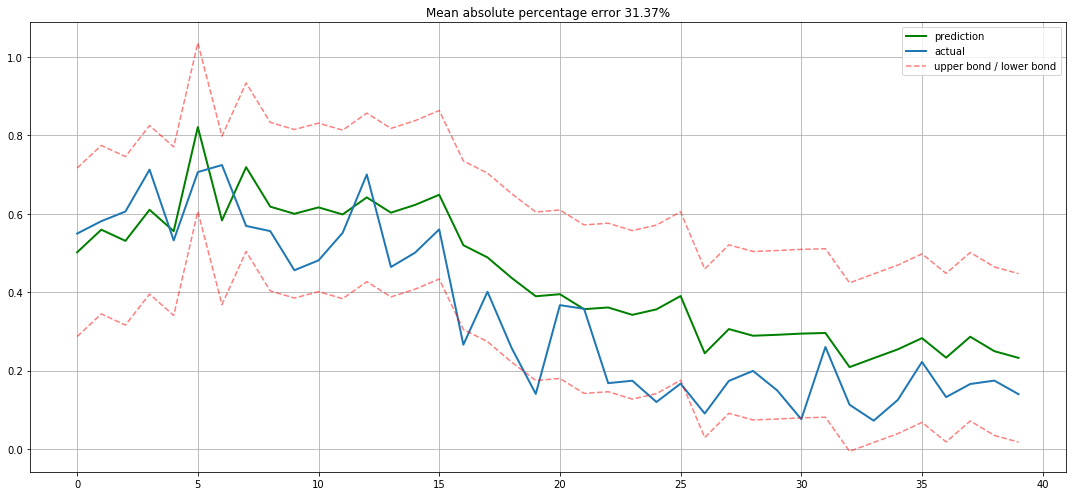

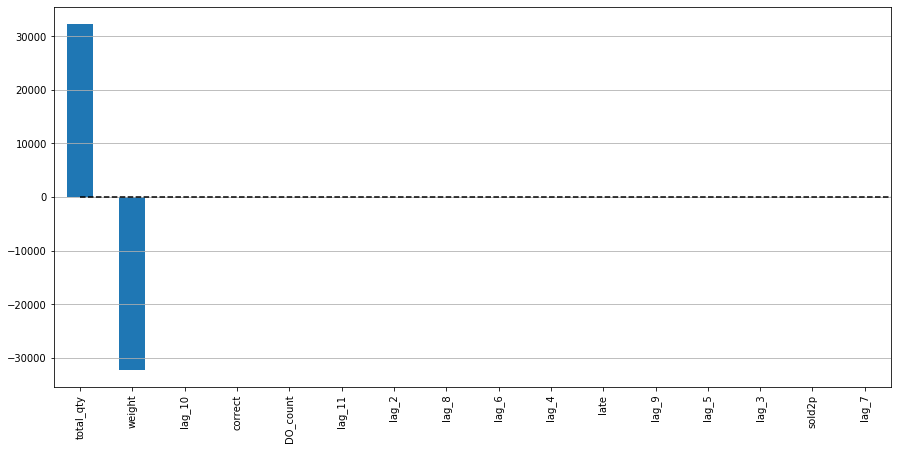

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler()
mmscaler = MinMaxScaler()
rscaler = RobustScaler()

y = df1.dropna().y
X = df1.dropna().drop(['y'], axis=1)

X_train, X_test, y_train, y_test = timeseries_train_test_split(X, y, test_size=0.3)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

plotModelResults(lr, X_train=X_train_scaled, X_test=X_test_scaled, plot_intervals=True)
plotCoefficients(lr)

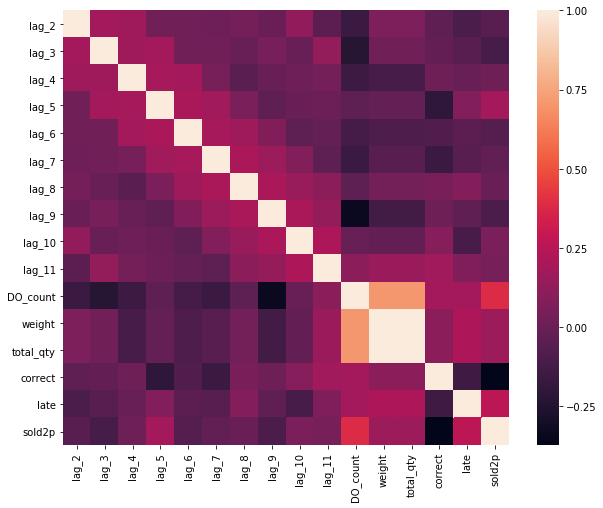

In [24]:
plt.figure(figsize=(10,8))
sns.heatmap(X_train.corr())
plt.show();

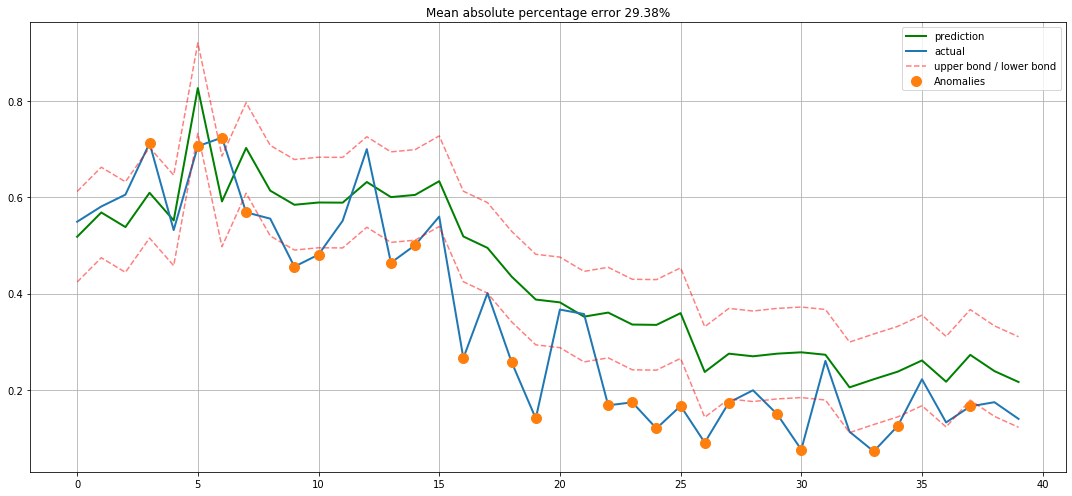

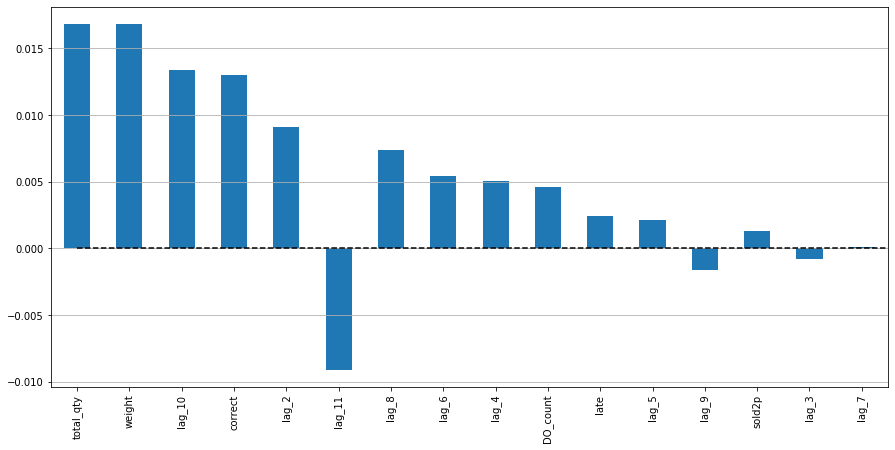

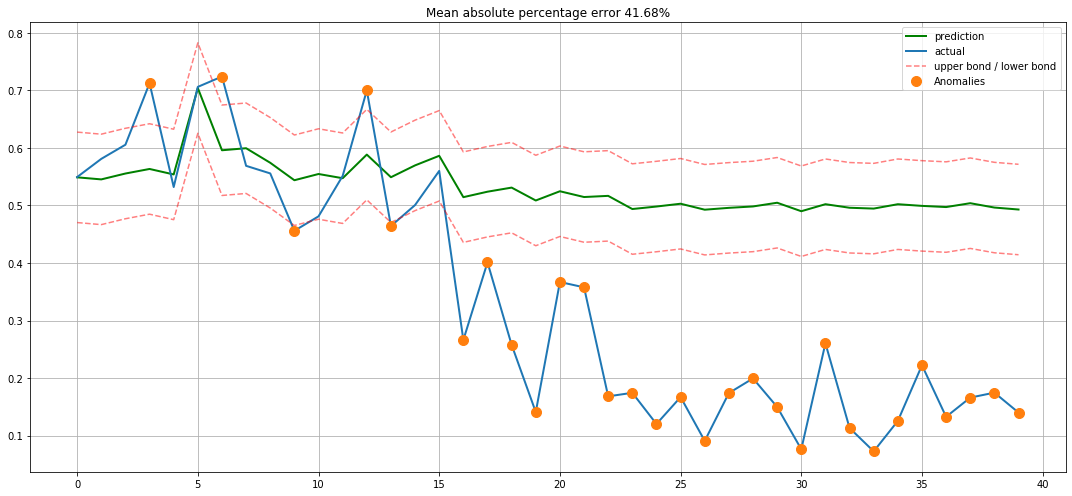

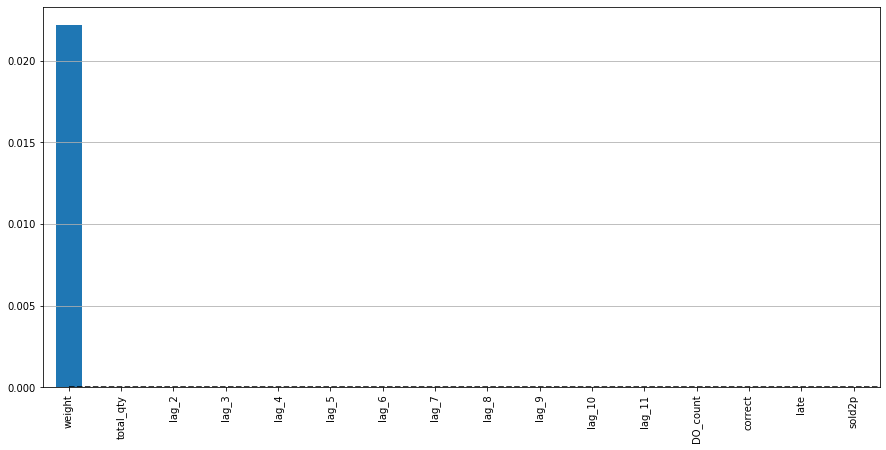

In [63]:
from sklearn.linear_model import LassoCV, RidgeCV, Ridge

ridge = RidgeCV(cv=tscv)
ridge.fit(X_train_scaled, y_train)

plotModelResults(ridge,
                X_train = X_train_scaled,
                X_test = X_test_scaled,
                plot_intervals=True,
                plot_anomalies=True)

plotCoefficients(ridge)


lasso = LassoCV(cv=tscv)
lasso.fit(X_train_scaled, y_train)

plotModelResults(lasso,
                X_train = X_train_scaled,
                X_test = X_test_scaled,
                plot_intervals=True,
                plot_anomalies=True)

plotCoefficients(lasso)

In [37]:
#----------------------------------------------------------
#----------------------------------------------------------
#reduce the effect of the features due to overfitting
ridge1 = Ridge()
ridge1.set_params(alpha=1.0)
ridge1.fit(X, y)
ridge1.score(X, y)


0.7935197607464598

In [38]:
coefs = []
intercepts = []
R2  = []
alphaRange = np.linspace(1e-3,200,20)
for alpha in alphaRange:
    ridge.set_params(alpha=alpha)  
    ridge.fit(X, y)
    intercepts.append(ridge.intercept_)
    coefs.append(ridge.coef_)
    R2.append(ridge.score(X, y))  

Text(0.5, 1.0, 'Change of Ridge Intercept Varying Alpha')

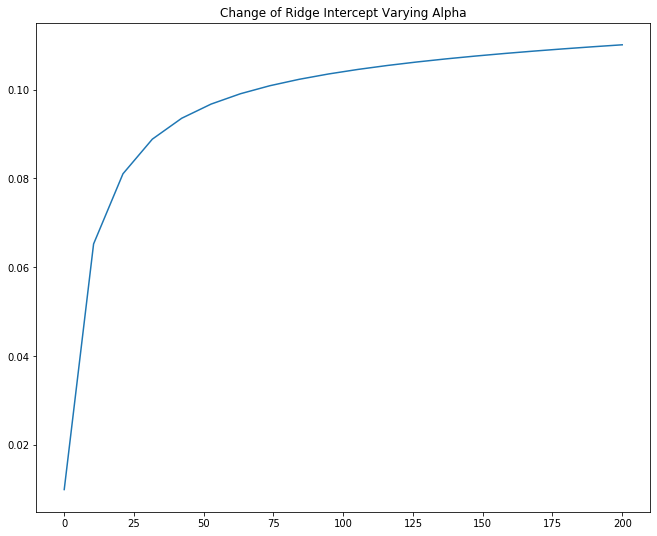

In [39]:
plt.plot(alphaRange, intercepts)
plt.title('Change of Ridge Intercept Varying Alpha')

Text(0.5, 1.0, 'Change of Ridge Slopes Varying Alpha')

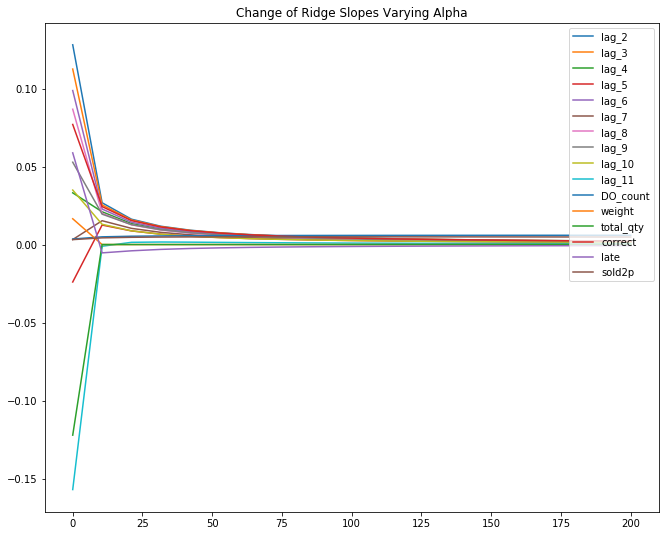

In [42]:
coefs = pd.DataFrame(np.array(coefs), columns=X.columns)

for name in coefs.columns:
    plt.plot(alphaRange, coefs[name], label=name)
plt.legend(loc=1)    
plt.title('Change of Ridge Slopes Varying Alpha')

Text(0.5, 1.0, 'Change of $R^2$ Varying Alphas')

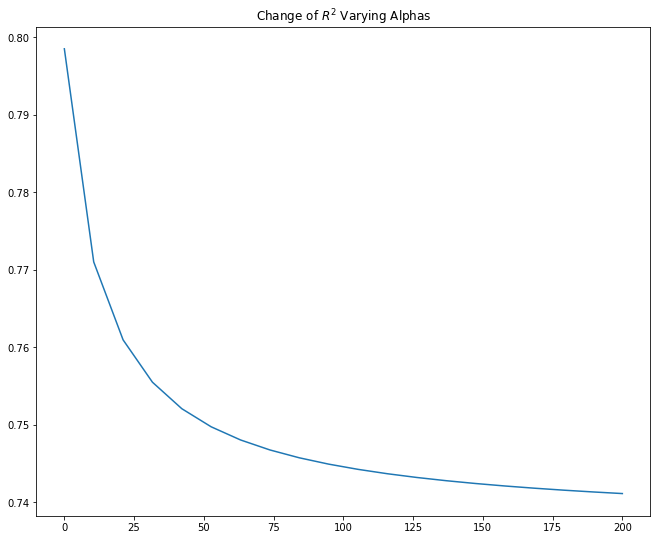

In [43]:
plt.plot(alphaRange, R2)
plt.title(r'Change of $R^2$ Varying Alphas')

In [51]:
train_R2 = []
test_R2  = []
alphaRange = np.linspace(1e-3,200,20)
for alpha in alphaRange:
    ridge1.set_params(alpha=alpha, normalize=False)  
    ridge1.fit(X_train_scaled, y_train)
    train_R2.append(ridge1.score(X_train_scaled, y_train))
    test_R2.append(ridge1.score(X_test_scaled, y_test))

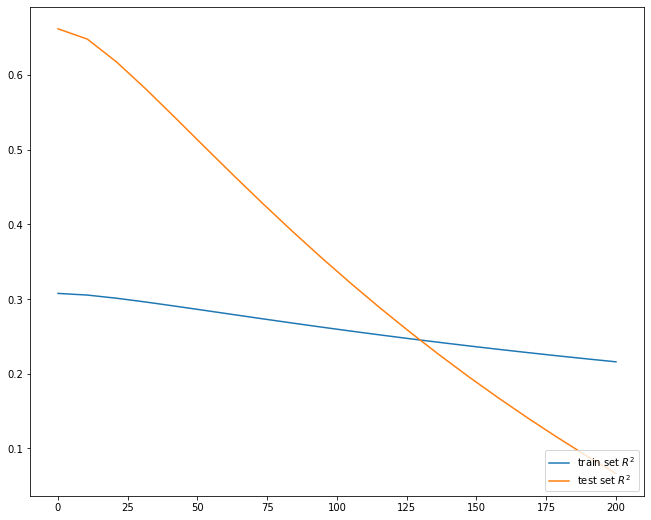

In [52]:
plt.plot(alphaRange, train_R2, label=r'train set $R^2$')
plt.plot(alphaRange, test_R2, label=r'test set $R^2$')
plt.legend(loc=4)

In [54]:
ridge1.set_params(alpha=130)
ridge1.fit(X, y)
coefDF = pd.Series(ridge.coef_, index=X.columns)
print('The intercept is %.4f' %(ridge.intercept_))
print('The slopes are %s' %(coefDF))

The intercept is 0.5546
The slopes are lag_2        0.009
lag_3       -0.001
lag_4        0.005
lag_5        0.002
lag_6        0.005
lag_7        0.000
lag_8        0.007
lag_9       -0.002
lag_10       0.013
lag_11      -0.009
DO_count     0.005
weight       0.017
total_qty    0.017
correct      0.013
late         0.002
sold2p       0.001
dtype: float64


In [ ]:
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

model_ridge = Ridge()
alphas = np.linspace(400, 200000, 50)
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation - Just Do It")
plt.xlabel("alpha")
plt.ylabel("rmse")

cv_ridge.min()

- interval time 
- freeze time:: 2WK
- hold out set: prameter 2 WKs out advanced.
- update the prediction interval == update interval.
- predictions for 1 day in adanced.


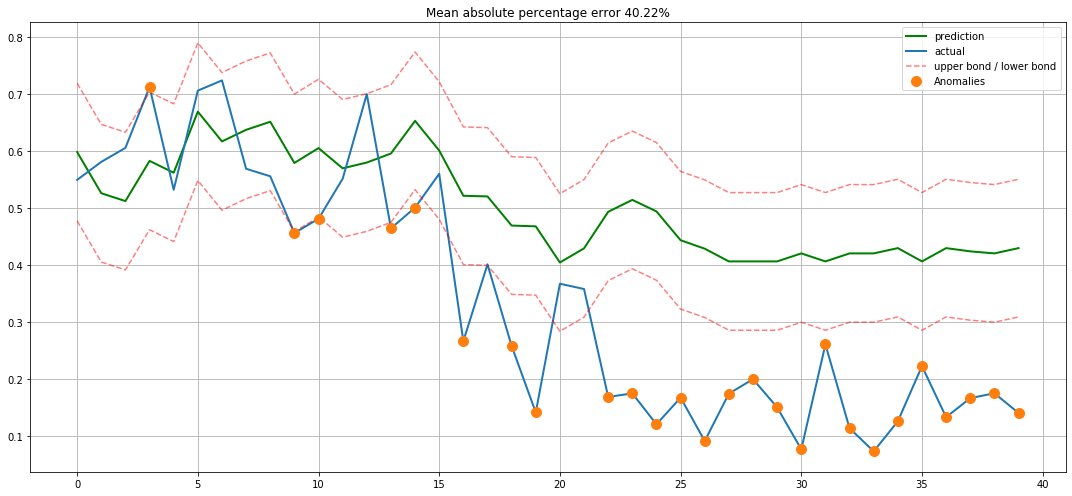

In [348]:
from xgboost import XGBRegressor

xgb = XGBRegressor(objective ='reg:squarederror')
xgb.fit(X_train_scaled, y_train)

plotModelResults(xgb,
                X_train=X_train_scaled,
                X_test=X_test_scaled,
                plot_intervals=True,
                plot_anomalies=True)

In [331]:
xgb.predict(X_test_scaled)

array([0.46615356, 0.44304705, 0.43819723, 0.56033313, 0.5167555 ,
       0.59746826, 0.47970092, 0.6830745 , 0.5424602 , 0.55110973,
       0.577727  , 0.59495205, 0.5120042 , 0.5617441 , 0.5253259 ,
       0.52032065, 0.51455283, 0.5195336 , 0.4440562 , 0.3200237 ,
       0.45670998, 0.3591646 , 0.36200753, 0.36197078, 0.36901087,
       0.38273457, 0.45084777, 0.36897856, 0.35630855, 0.36610666,
       0.35727465, 0.35033748, 0.33666843, 0.33583573, 0.34294188,
       0.35727465, 0.34294188, 0.35727465, 0.33583573, 0.35727465,
       0.3799631 ], dtype=float32)

# ElasticNet

# Tuning on Regularization

TypeError: unsupported operand type(s) for ^: 'float' and 'int'

In [21]:
correct

,Correct_DC
Document date,
2016-12-11,0.000
2016-12-18,0.000
2016-12-25,0.000
2017-01-01,2.000
2017-01-08,7.000
2017-01-15,6.333
2017-01-22,6.000
2017-01-29,9.500
2017-02-05,7.200


In [46]:
temp.pivot_table(values='Order qty', index='Ship to Party Name', aggfunc = lambda x: x.sum()).sort_values(by='Order qty', ascending=False).stack().reset_index(level=1)

,level_1,0
Ship to Party Name,,
PUBLIX SUPER MARKETS,Order qty,98532
H E BUTT GROC CO,Order qty,96369
PEYTONS NORTH,Order qty,78899
KING SOOPERS,Order qty,61488
FOOD LION/DELHAIZE AMERICA DC7,Order qty,57153
RALPHS GROCERY CO,Order qty,42781
DEMOULAS SUPERMARKET,Order qty,32424
WAL-MART DC 6020,Order qty,27770
PUBLIX LAKELAND DRY GROCERY (4101),Order qty,26628


In [13]:
df.pivot_table(values='Order qty', index=['Document date'],columns='Plant',aggfunc = lambda x: x.sum()).fillna(0)

Plant,USC8,USD3,USE2,USJ7,USV2,USV6
Document date,,,,,,
2016-08-25,0.0,0.0,0.0,336.0,0.0,0.0
2016-08-26,0.0,0.0,0.0,2352.0,0.0,0.0
2016-08-28,0.0,0.0,0.0,336.0,0.0,0.0
2016-08-29,0.0,0.0,0.0,0.0,336.0,0.0
2016-10-06,336.0,0.0,0.0,0.0,0.0,0.0
2016-10-07,0.0,0.0,0.0,0.0,1008.0,336.0
2016-10-10,0.0,0.0,672.0,0.0,0.0,0.0
2016-10-11,336.0,0.0,0.0,0.0,0.0,0.0
2016-10-12,336.0,0.0,0.0,0.0,0.0,0.0
